In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## 1.1 Compute ROC & AUC for combined test sets. n=10, r=4

In [3]:
def convert_txt_to_array(filepath):
    preds = []
    txt = open(filepath, 'r')
    for line in txt:
        preds.append(line)
    preds = np.array(preds).astype('float32')
    return preds    

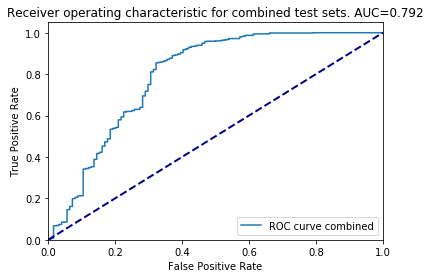

In [5]:
## Load in prediction files
english_preds = convert_txt_to_array('english_testpred_r4.txt')
tagalan_preds = convert_txt_to_array('tagalog_testpred_r4.txt')
combined_preds = convert_txt_to_array('combined_testpred_r4.txt')
preds = [english_preds, tagalan_preds, combined_preds]
names = ['english', 'tagalan', 'combined']

## determine class labels
n_english, n_tagalan, n_combined = english_preds.shape[0], tagalan_preds.shape[0], combined_preds.shape[0]
english_labels = np.zeros(n_english)
tagalan_labels = np.ones(n_tagalan)
combined_labels = np.ones(n_combined)
combined_labels[:n_english] = 0.
labels = [english_labels, tagalan_labels, combined_labels]

## fit roc curve on combined labels
plt.figure()   
fpr, tpr, _ = roc_curve(y_true=combined_labels, y_score=combined_preds)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve '+names[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic for combined test sets. AUC={np.round(auc_score,3)}')
plt.legend(loc="lower right")
plt.savefig('figures/1a_roc_curve.png')
plt.show()



## 1.2 : varying the value of r

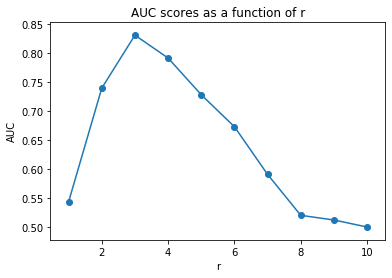

In [6]:
r_values = np.arange(1,11) 
auc_scores = np.zeros(len(r_values))
for i,r in enumerate(r_values):
    filepath = f'r_values/r{r}_preds.txt'
    preds = convert_txt_to_array(filepath)
    fpr, tpr, _ = roc_curve(y_true=combined_labels, y_score=preds)
    auc_scores[i] = auc(fpr, tpr)
    
## Plot auc scores as a function of r
plt.figure()
plt.plot(r_values, auc_scores)
plt.scatter(r_values, auc_scores)
plt.xlabel('r')
plt.ylabel('AUC')
plt.title('AUC scores as a function of r')
plt.savefig('figures/1b_auc_scores.png')
plt.show()    

## 1.3 Diffferent languages

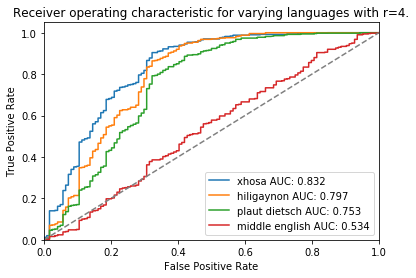

In [18]:
## load in predictions
hiligaynon = 'lang/english_hiligaynon_r4_preds.txt'
middle_english = 'lang/english_middle-english_r4_preds.txt'
plautdietsch = 'lang/english_plautdietsch_r4_preds.txt'
xhosa = 'lang/english_xhosa_r4_preds.txt'
paths = [xhosa, hiligaynon, plautdietsch, middle_english]
names = [ 'xhosa', 'hiligaynon'  , 'plaut dietsch', 'middle english']

## iterate over languages
FPR, TPR, AUC = [], [], np.zeros(len(paths))
for i, path in enumerate(paths):
    pred = convert_txt_to_array(path)
    labels = np.ones(len(pred))
    labels[:n_english] = 0.

    # save fpr, tpr
    fpr, tpr, _ = roc_curve(y_true=labels, y_score=pred)
    AUC[i] = auc(fpr, tpr)
    FPR.append(fpr)
    TPR.append(tpr)
    
    
## plot ROC curves
plt.figure()  
for i, (fpr, tpr) in enumerate(zip(FPR,TPR)):
    plt.plot(fpr, tpr, label=f'{names[i]} AUC: {np.round(AUC[i],3)}')
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic for varying languages with r=4.')
plt.legend(loc="lower right")
plt.savefig('figures/1c1_roc_curves.png')
plt.show()

## Plot AUC values as bar plot
